In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from model import *
from utils import *
from config import *


In [3]:
train_loader, _,_ = create_dataloaders(
        npz_path="datasets/seq/15/seq_train.npz",
        batch_size=16,
        val_ratio=0,
        test_ratio=0
    )
val_loader, test_loader,_ = create_dataloaders(
        npz_path="datasets/seq/15/seq_validation.npz",
        batch_size=16,
        val_ratio=0.3,
        test_ratio=0
    )

# train_loader,val_loader, test_loader= create_dataloaders(
#         npz_path="datasets/seq/seq_gesture.npz",
#         batch_size=16,
#         val_ratio=0.3,
#         test_ratio=0.1
#     )

Dataset loaded. Total samples: 959
Feature shape: (959, 15, 99), Number of label classes: 5

Dataset split:
Training set: 959 samples
Validation set: 0 samples
Test set: 0 samples
Dataset loaded. Total samples: 464
Feature shape: (464, 15, 99), Number of label classes: 5

Dataset split:
Training set: 325 samples
Validation set: 139 samples
Test set: 0 samples


In [4]:
# 3. 初始化模型
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTMClassifier(input_size=99, hidden_size=64, num_layers=2, num_classes=5).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [5]:
history = train(model, train_loader, val_loader, criterion, optimizer, device, epochs=50)


Epoch 1/50: Train Loss: 1.1691, Train Acc: 0.5777 | Val Loss: 0.9569, Val Acc: 0.5687
Epoch 2/50: Train Loss: 0.4249, Train Acc: 0.8436 | Val Loss: 0.6306, Val Acc: 0.8125
Epoch 3/50: Train Loss: 0.1971, Train Acc: 0.9406 | Val Loss: 0.7143, Val Acc: 0.8187
Epoch 4/50: Train Loss: 0.0839, Train Acc: 0.9687 | Val Loss: 0.7141, Val Acc: 0.7937
Epoch 5/50: Train Loss: 0.0415, Train Acc: 0.9771 | Val Loss: 0.7230, Val Acc: 0.8313
Epoch 6/50: Train Loss: 0.0155, Train Acc: 0.9812 | Val Loss: 0.7918, Val Acc: 0.8125
Epoch 7/50: Train Loss: 0.0385, Train Acc: 0.9698 | Val Loss: 0.7131, Val Acc: 0.8438
Epoch 8/50: Train Loss: 0.0149, Train Acc: 0.9812 | Val Loss: 0.7615, Val Acc: 0.8344
Epoch 9/50: Train Loss: 0.0086, Train Acc: 0.9823 | Val Loss: 0.8840, Val Acc: 0.8094
Epoch 10/50: Train Loss: 0.0372, Train Acc: 0.9718 | Val Loss: 0.7933, Val Acc: 0.8344
Epoch 11/50: Train Loss: 0.0999, Train Acc: 0.9520 | Val Loss: 0.9209, Val Acc: 0.7500
Epoch 12/50: Train Loss: 0.0229, Train Acc: 0.9781 |

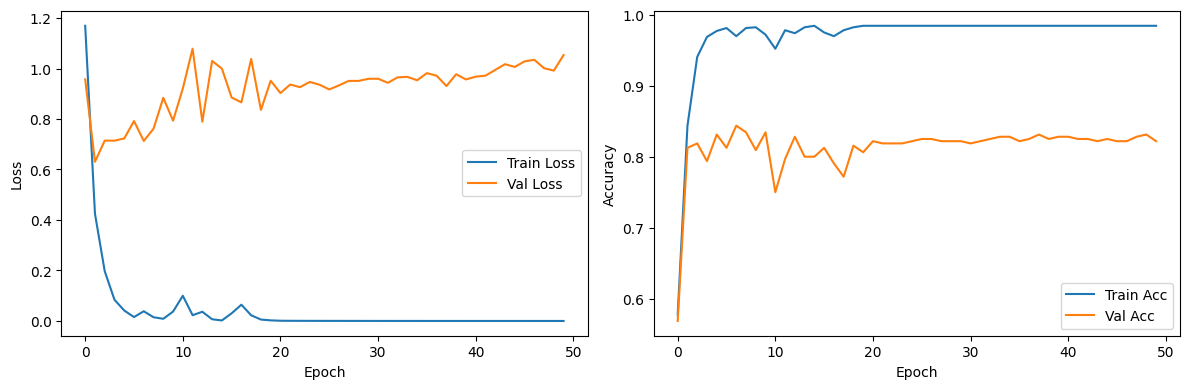

train history saved to output/history_15.png


<Figure size 640x480 with 0 Axes>

In [6]:
 # 5. 可视化训练曲线
plot_history(history,save_path='output/history_15.png')

In [7]:
test_result = evaluate(model, val_loader,criterion, device)
test_true ,test_pred = test_result['y_true'],test_result['y_pred']
class_names =ACTIONS

Confusion matrix saved to output/confusion_matrix_raw_15.png


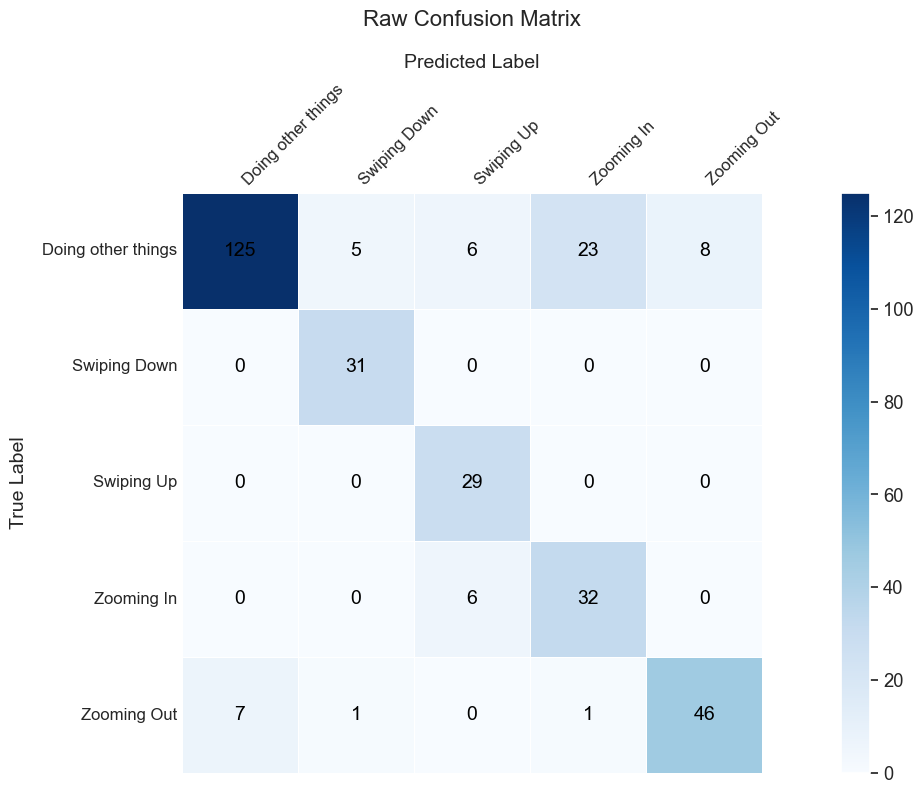

In [8]:

plot_confusion_matrix(test_true, test_pred, 
                     classes=class_names,
                     title='Raw Confusion Matrix',
                     save_path='output/confusion_matrix_raw_15.png')



Confusion matrix saved to output/confusion_matrix_norm_15.png


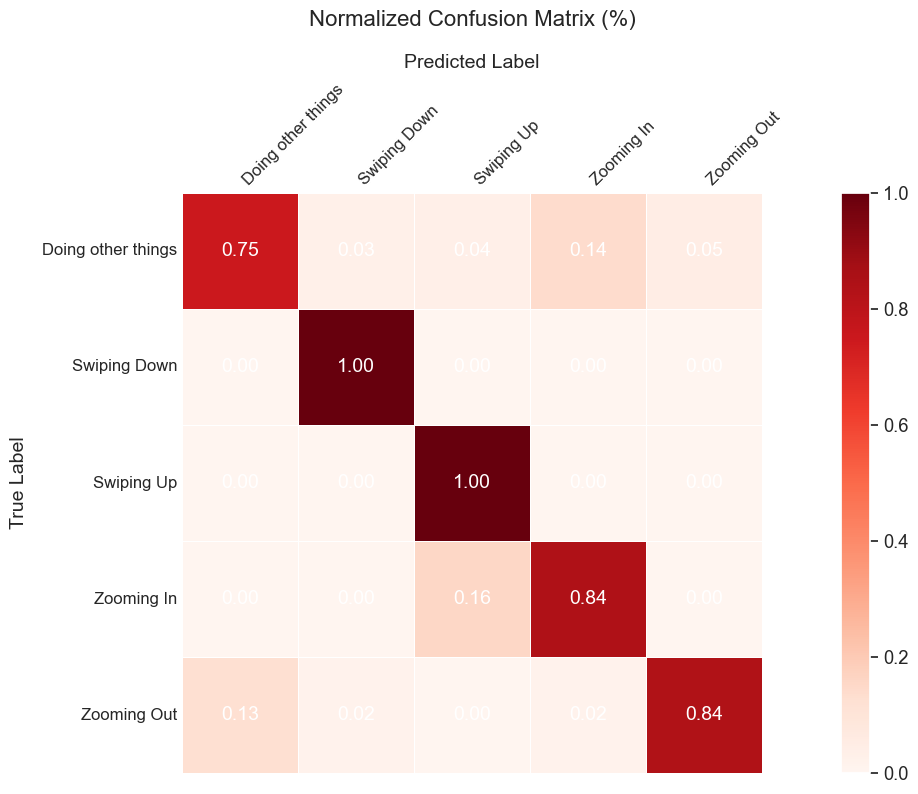

In [9]:
# 2. 归一化百分比矩阵
plot_confusion_matrix(test_true, test_pred, 
                     classes=class_names, normalize=True,
                     title='Normalized Confusion Matrix (%)',
                     cmap=plt.cm.Reds,
                     save_path='output/confusion_matrix_norm_15.png')

In [10]:
torch.save({
    'model_state_dict': model.state_dict(),
    'history': history
}, 'model/lstm_model_15.pth')